## Sample 8.1 a few samples about bootstrap

In [1]:
%matplotlib inline
#posteior distribution of binomial data
import numpy as np
import numpy.linalg as nl
import scipy.stats as stats
import matplotlib.pyplot as plt
import matplotlib
import astropy.io.fits as fits
import scipy.special as special
from scipy.optimize import curve_fit

matplotlib.rc('xtick', labelsize=12) 
matplotlib.rc('ytick', labelsize=12) 

'''
Bootstraping function and sample
'''
def bootstrap(func, x, N, alpha=0.15):
    '''
    Run a boots
    
    Parameters:
    func: function using x as arguement
    x: data
    N: number of repeat
    alpha: percentile
    '''
    nx = len(x)
    xb = np.random.choice(x, (nx,N), replace=True)
    #print np.shape(xb)
    yb = func(xb,axis=0)
    lower = np.percentile(yb, alpha*100)
    upper = np.percentile(yb, (1.-alpha)*100)
    return lower, upper

def bootstrap_smooth(func, x, e, N, alpha=0.15):
    '''
    Run a boots
    
    Parameters:
    func: function using x as arguement
    x: data
    N: number of repeat
    alpha: percentile
    '''
    nx = len(x)
    xx = x #+ np.random.normal(0,e,len(x))
    xb = np.random.choice(xx, (nx,N), replace=True) + np.random.normal(0,e,(nx,N))
    #print np.shape(xb)
    yb = func(xb,axis=0)
    lower = np.percentile(yb, alpha*100)
    upper = np.percentile(yb, (1.-alpha)*100)
    return lower, upper
    

In [2]:
'''
Load sample data
'''
f = open('VT_selected.dat')
VT = np.array([np.double(line) for line in f])
f.close()

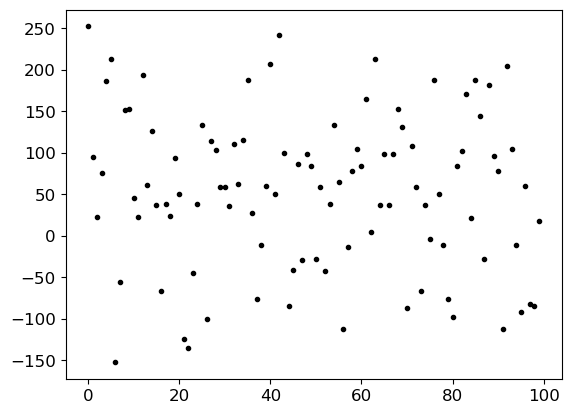

In [3]:
'''
Check data
'''
plt.plot(VT,'k.')
plt.show()

In [5]:
'''
Calculate mean and error of mean
'''
mean_V = np.mean(VT)
cc = bootstrap(np.mean,VT,10000,alpha=0.15)
print('Bootstraping result with 15%-85% uncertainty:')
print('mean=%(m).1f, low=%(l).1f, high=%(h).1f' % {'m':mean_V,'l':cc[0],'h':cc[1]})

cc = bootstrap(np.mean,VT,1000,alpha=0.025)
print('Bootstraping result with 2.5% and 97.5% uncertainty:')
print('mean=%(m).1f, low=%(l).1f, high=%(h).1f' % {'m':mean_V,'l':cc[0],'h':cc[1]})

cc_sm = bootstrap_smooth(np.mean,VT,5.,100,alpha=0.15)
print('smoothed bootstraping result:')
print('mean=%(m).1f, low=%(l).1f, high=%(h).1f' % {'m':mean_V,'l':cc_sm[0],'h':cc_sm[1]})

Bootstraping result with 15%-85% uncertainty:
mean=53.5, low=43.6, high=63.3
Bootstraping result with 2.5% and 97.5% uncertainty:
mean=53.5, low=33.9, high=71.9
smoothed bootstraping result:
mean=53.5, low=42.6, high=63.0


In [6]:
'''
Calculate std and error of std
'''
std_V = np.std(VT)
cc = bootstrap(np.std,VT,1000,alpha=0.15)
cc_sm = bootstrap_smooth(np.std,VT,10.,1000,alpha=0.15)
print('Bootstraping result:')
print('std=%(m).1f, low=%(l).1f, high=%(h).1f' % {'m':std_V,'l':cc[0],'h':cc[1]})
print('smoothed bootstraping result:')
print('std=%(m).1f, low=%(l).1f, high=%(h).1f' % {'m':std_V,'l':cc_sm[0],'h':cc_sm[1]})

Bootstraping result:
std=93.4, low=87.3, high=98.7
smoothed bootstraping result:
std=93.4, low=87.9, high=98.8
